In [97]:
import random
import numpy as np
import statistics 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import ndimage
from scipy import stats
from scipy.spatial import distance
from scipy.stats.stats import pearsonr 
import scipy.signal 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

from sklearn import preprocessing
from itertools import cycle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

import matlab
import matlab.engine

#plotting params
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = '0.5'
mpl.rcParams['axes.labelsize'] = '8'
mpl.rcParams['axes.labelcolor'] = 'black'

mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['ytick.color'] = 'black'


def mutualinfo_cell_stim(binned_behav_vector, binned_data_events_categorised):
        """CELL STIMULUS MUTUAL INFORMATION calculated using behavioual vector
        and the binned data events"""
        #Probability of each behaviour occuring
        count_dic = {}
        for behaviour in binned_behav_vector:
            #Number of spikes of different amplitude during different behaviours
            count_entry = str(int(behaviour))
            if count_entry in count_dic:
                count_dic[count_entry] += 1
            else:
                count_dic[count_entry] = 1  
        probability_dic ={}
        for key in count_dic:
            probability_dic[key] = count_dic[key]/sum(count_dic.values())

        mi_r_cat = []
        probability_dic_all = {}
        for neuron in range(len(binned_data_events_categorised)): 
            #Define probability of each neuron firing
            count_individ_dic = {0:0, 1:0}
            for spike in binned_data_events_categorised[neuron]:
                spike_count_entry = int(spike)
                if spike_count_entry > 0:
                    count_individ_dic[1] += spike*1
                else:
                    count_individ_dic[0] += 1 

            probability_response_dic = {}
            for key in count_individ_dic:
                probability_response_dic[key] = count_individ_dic[key]/sum(count_dic.values())

            #define entropy for every neuron
            entropyr = 0
            for key in probability_response_dic:
                entropyr += -(probability_response_dic[key]*math.log2(probability_response_dic[key]))

            #intialise count__spike_behav_dic
            count__spike_behav_dic = {}
            for key in count_dic:
                count__spike_behav_dic['0'+key]=0
                count__spike_behav_dic['1'+key]=0    

            #How many spikes are there during each behaviour
            for spike, behaviour in zip(binned_data_events_categorised[neuron], binned_behav_vector):
                count_entry = str(int(spike))+str(int(behaviour))
                if int(count_entry[0]) > 0:
                    count_entry = str(1)+str(int(behaviour))
                    count__spike_behav_dic[count_entry] += spike*1
                else:
                    count__spike_behav_dic[count_entry] += 1

            #What is the probability of that spike during the behaviour
            probability_spike_behav_dic = {}         
            for key in count__spike_behav_dic:
                probability_spike_behav_dic[key] = count__spike_behav_dic[key]/sum(count_dic.values())

            cond_entropy_dic = {'0':0, '1':0, '2':0}
            cond_ent =0
            for key in probability_spike_behav_dic:
                if  probability_spike_behav_dic[key] > 0:
                    cond_entropy_dic[key[1]] += probability_spike_behav_dic[key]*math.log2(probability_dic[key[1]]/probability_spike_behav_dic[key])
                    cond_ent += probability_spike_behav_dic[key]*math.log2(probability_dic[key[1]]/probability_spike_behav_dic[key])

            mi_resbehav = entropyr - cond_ent
            mi_r_cat.append(mi_resbehav)

        total_categorised_info = sum(mi_r_cat)
        return mi_r_cat
    
def event_categorization(event_trace, bins = 4):
    """"Categorize all event traces into different bins of spike amplitudes.
    Due to low resolution, we can account for any lost spikes and weight events accordingly"""
    bin_size = 1/bins #<---- must be greater than 0.25
    all_events = []
    data_events_categorised = []
    for neuron in range(len(event_trace)):
        neuron_events_categorised = []
        for event in event_trace[neuron]:
            if event > 0:
                if event < bin_size:
                    neuron_events_categorised.append(1)
                elif bin_size < event < (bin_size*2):
                    neuron_events_categorised.append(2)
                elif (bin_size*2) < event < (bin_size*3):
                    neuron_events_categorised.append(3)
                elif (bin_size*3) < event < (bin_size*4):
                    neuron_events_categorised.append(4)
                elif (bin_size*4) < event < (bin_size*5):
                    neuron_events_categorised.append(5)
                elif (bin_size*5) < event < (bin_size*6):
                    neuron_events_categorised.append(6)
                elif (bin_size*6) < event < (bin_size*7):
                    neuron_events_categorised.append(7)
                elif (bin_size*7) < event < (bin_size*8):
                    neuron_events_categorised.append(8)
                elif (bin_size*8) < event < (bin_size*9):
                    neuron_events_categorised.append(9)
                elif (bin_size*9) < event < (bin_size*10):
                    neuron_events_categorised.append(10)
                elif (bin_size*10) < event < (bin_size*11):
                    neuron_events_categorised.append(11)
                elif (bin_size*11) < event < (bin_size*12):
                    neuron_events_categorised.append(12)
                elif (bin_size*12) < event < (bin_size*13):
                    neuron_events_categorised.append(13)
                elif (bin_size*13) < event < (bin_size*14):
                    neuron_events_categorised.append(14)
                elif (bin_size*14) < event < (bin_size*15):
                    neuron_events_categorised.append(15)
                elif (bin_size*15) < event < (bin_size*16):
                    neuron_events_categorised.append(16)
                elif (bin_size*16) < event < (bin_size*17):
                    neuron_events_categorised.append(17)
                elif (bin_size*17) < event < (bin_size*18):
                    neuron_events_categorised.append(18)
                elif (bin_size*18) < event < (bin_size*19):
                    neuron_events_categorised.append(19)
                elif (bin_size*19) < event < (bin_size*20):
                    neuron_events_categorised.append(20)
                elif (bin_size*20) < event < (bin_size*21):
                    neuron_events_categorised.append(21)
                elif (bin_size*21) < event < (bin_size*22):
                    neuron_events_categorised.append(22)
                elif (bin_size*22) < event < (bin_size*23):
                    neuron_events_categorised.append(23)
                elif (bin_size*23) < event < (bin_size*24):
                    neuron_events_categorised.append(24)
                elif (bin_size*24) < event < (bin_size*25):
                    neuron_events_categorised.append(25)
                elif (bin_size*25) < event < (bin_size*26):
                    neuron_events_categorised.append(26)
                elif (bin_size*26) < event < (bin_size*27):
                    neuron_events_categorised.append(27)
                elif (bin_size*27) < event < (bin_size*28):
                    neuron_events_categorised.append(28)
                elif (bin_size*28) < event < (bin_size*29):
                    neuron_events_categorised.append(29)
                elif (bin_size*29) < event < (bin_size*30):
                    neuron_events_categorised.append(30)
                elif (bin_size*30) < event < (bin_size*31):
                    neuron_events_categorised.append(31)
                elif (bin_size*31) < event < (bin_size*32):
                    neuron_events_categorised.append(32)
                elif (bin_size*32) < event < (bin_size*33):
                    neuron_events_categorised.append(33)
                elif (bin_size*33) < event < (bin_size*34):
                    neuron_events_categorised.append(34)
                elif (bin_size*34) < event < (bin_size*35):
                    neuron_events_categorised.append(35)
                elif (bin_size*35) < event < (bin_size*36):
                    neuron_events_categorised.append(36)
                elif (bin_size*36) < event < (bin_size*37):
                    neuron_events_categorised.append(37)
                elif (bin_size*37) < event < (bin_size*38):
                    neuron_events_categorised.append(38)
                elif (bin_size*38) < event < (bin_size*39):
                    neuron_events_categorised.append(39)
                elif (bin_size*39) < event < (bin_size*40):
                    neuron_events_categorised.append(40)
                elif (bin_size*40) < event < (bin_size*41):
                    neuron_events_categorised.append(41)
                elif (bin_size*41) < event < (bin_size*42):
                    neuron_events_categorised.append(42)
                elif (bin_size*42) < event < (bin_size*43):
                    neuron_events_categorised.append(43)
                elif (bin_size*43) < event < (bin_size*44):
                    neuron_events_categorised.append(44)
                elif (bin_size*44) < event < (bin_size*45):
                    neuron_events_categorised.append(45)
                elif (bin_size*45) < event < (bin_size*46):
                    neuron_events_categorised.append(46)
                elif (bin_size*46) < event < (bin_size*47):
                    neuron_events_categorised.append(47)
                elif (bin_size*47) < event < (bin_size*48):
                    neuron_events_categorised.append(48)
                elif (bin_size*48) < event < (bin_size*49):
                    neuron_events_categorised.append(49)
                elif (bin_size*49) < event < (bin_size*50):
                    neuron_events_categorised.append(50)
            else:
                neuron_events_categorised.append(0)         
        data_events_categorised.append(neuron_events_categorised)
    return data_events_categorised

def spike_binning(spike_array, bin_size=4):
    bin_size = bin_size
    binned_spikes = []
    for neuron in spike_array:
        per_neuron=[]
        i=0
        while i <= len(neuron):
            per_neuron.append(sum(neuron[i:i+bin_size]))
            i+=bin_size
        binned_spikes.append(per_neuron)
    return binned_spikes

def behav_vector_binning(behav_vector, bin_size=4):
    bin_size = bin_size
    binned_behav_vector = []
    i=0
    while i <= len(behav_vector):
        binned_behav_vector.append(stats.mode(behav_vector[i:i+bin_size])[0])
        i+=bin_size
    return binned_behav_vector

In [101]:
animals = ['F', 'L', 'I']
for animal in animals:
    print(animal)
    insert_animal = animal

    inputEventTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_events.csv'
    inputTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_trace.csv'

    data_event = pd.read_csv(inputEventTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
    data_trace = pd.read_csv(inputTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
    data_trace['unique_stage']=data_trace['stage']+data_trace['session'].astype(str)

    def get_session(data_event_or_data_trace):
        """"get session takes the mega_event or trace file in and returns a list of all the session blocks
        INPUT:
        -------
        >> data_event_or_data_trace - mega_events OR mega_trace file

        OUTPUT:
        -------
        >> blocks - a list of all events or traces as in dataframe format """

        batches_dic = {'Exp1':1, 'Pre1':2, 'Nov1':3, 'Exp2':4, 'Pre2':5, 'Nov2':6, 'Exp3':7, 'Nov3':8}
        batches = list(set(data_event_or_data_trace.unique_stage))
        sorted_batches = []
        for i in batches:
            sorted_batches.append(batches_dic[i])
        sorted_batches.sort()

        batches = []
        for i in sorted_batches:
            batches.append(list(batches_dic.keys())[list(batches_dic.values()).index(i)])

        blocks = []
        for batch in batches:
            blocks.append(data_event_or_data_trace[data_event_or_data_trace['unique_stage']==batch])

        return blocks

    traces = get_session(data_trace)
    events = get_session(data_event)

    events = [events[1], events[2], events[4], events[5], events[7]]
    traces = [traces[1], traces[2], traces[4], traces[5], traces[7]]

    for i in range(len(events)):
        sesh = i
        if insert_animal == 'F' or insert_animal == 'I':
            if i == 1 or i == 3 or i == 4:
                stranger = 'both'
            else:
                stranger = 2
        else:
            if i == 1 or i == 3 or i == 4:
                stranger = 'both'
            else:
                stranger = 1    

        ## --------------------------------------------------------------------------------------------------
        traces_session = traces[sesh]
        events_session = events[sesh]

        animal_cell_count = {'F':238, 'I':126, 'L':74}
        all_cells = traces_session.iloc[: , 2:animal_cell_count[insert_animal]] #<---- (ANF - 238 cells, ANI - 126 cells, ANL - 74 cells)
        cells_dictionary = traces_session.iloc[: , 2:animal_cell_count[insert_animal]].loc[:,~(traces_session==" nan").any()].columns.values
        nan_cells = (set(all_cells.columns.values).difference(cells_dictionary))

        data_trace = np.array(traces_session[cells_dictionary].astype(float)).transpose()
        data_events=np.array(events_session[cells_dictionary].astype(float)).transpose()
        data_events_normalized = normalize(data_events, axis=1)

        behav_vector = np.array(traces_session['raw_behaviour'].astype(float))
        print(np.array(traces_session['unique_stage'])[0])
        
        cage = stranger
        behav_vec_cropped = []
        for i in behav_vector:
            if cage == 2:
                if i == 2:
                    behav_vec_cropped.append(1)
                elif i == 1:
                    behav_vec_cropped.append(0)
                else:
                    behav_vec_cropped.append(0) 
            elif cage == 1:
                if i == 2:
                    behav_vec_cropped.append(0)
                elif i == 1:
                    behav_vec_cropped.append(1)
                else:
                    behav_vec_cropped.append(0) 
            elif cage == 'both':
                if i > 0:
                    behav_vec_cropped.append(1)
                else:
                    behav_vec_cropped.append(0) 

        behav_vector = np.array(behav_vec_cropped)

        bin_list = np.arange(1,51,1)
        pop_mutual_info = []
        for i in bin_list:
            data_events_categorised = event_categorization(data_events_normalized, bins = i)
            binned_data_events_categorised = np.array(spike_binning(data_events_categorised))
            binned_behav_vector = np.array(np.array(behav_vector_binning(behav_vector)).transpose().tolist()[0])

            empty = []
            empty_binary = []
            for i in range(len(binned_data_events_categorised)):
                if sum(binned_data_events_categorised[i]) == 0:
                    empty.append(i)

            binned_data_events_categorised = np.delete(binned_data_events_categorised, empty, 0).transpose()
            cells_dictionary = np.delete(cells_dictionary, empty, 0)
            binned_data_events_categorised = binned_data_events_categorised.transpose()

            pop_mutual_info.append(np.array(mutualinfo_cell_stim(binned_behav_vector, binned_data_events_categorised)))

            if insert_animal == 'F':
                if np.array(traces_session['unique_stage'])[0] == 'Pre1':
                    ANF_pre1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Pre2':
                    ANF_pre2_pop_mutual_info = pop_mutual_info

                elif np.array(traces_session['unique_stage'])[0] == 'Nov1':
                    ANF_nov1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov2':
                    ANF_nov2_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov3':
                    ANF_nov3_pop_mutual_info = pop_mutual_info

            if insert_animal == 'L':
                if np.array(traces_session['unique_stage'])[0] == 'Pre1':
                    ANL_pre1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Pre2':
                    ANL_pre2_pop_mutual_info = pop_mutual_info

                elif np.array(traces_session['unique_stage'])[0] == 'Nov1':
                    ANL_nov1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov2':
                    ANL_nov2_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov3':
                    ANL_nov3_pop_mutual_info = pop_mutual_info

            if insert_animal == 'I':
                if np.array(traces_session['unique_stage'])[0] == 'Pre1':
                    ANI_pre1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Pre2':
                    ANI_pre2_pop_mutual_info = pop_mutual_info

                elif np.array(traces_session['unique_stage'])[0] == 'Nov1':
                    ANI_nov1_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov2':
                    ANI_nov2_pop_mutual_info = pop_mutual_info
                elif np.array(traces_session['unique_stage'])[0] == 'Nov3':
                    ANI_nov3_pop_mutual_info = pop_mutual_info

F
Pre1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Pre2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


L
Pre1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Pre2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


I
Pre1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Pre2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov2


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


Nov3


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


0.2654605398800578


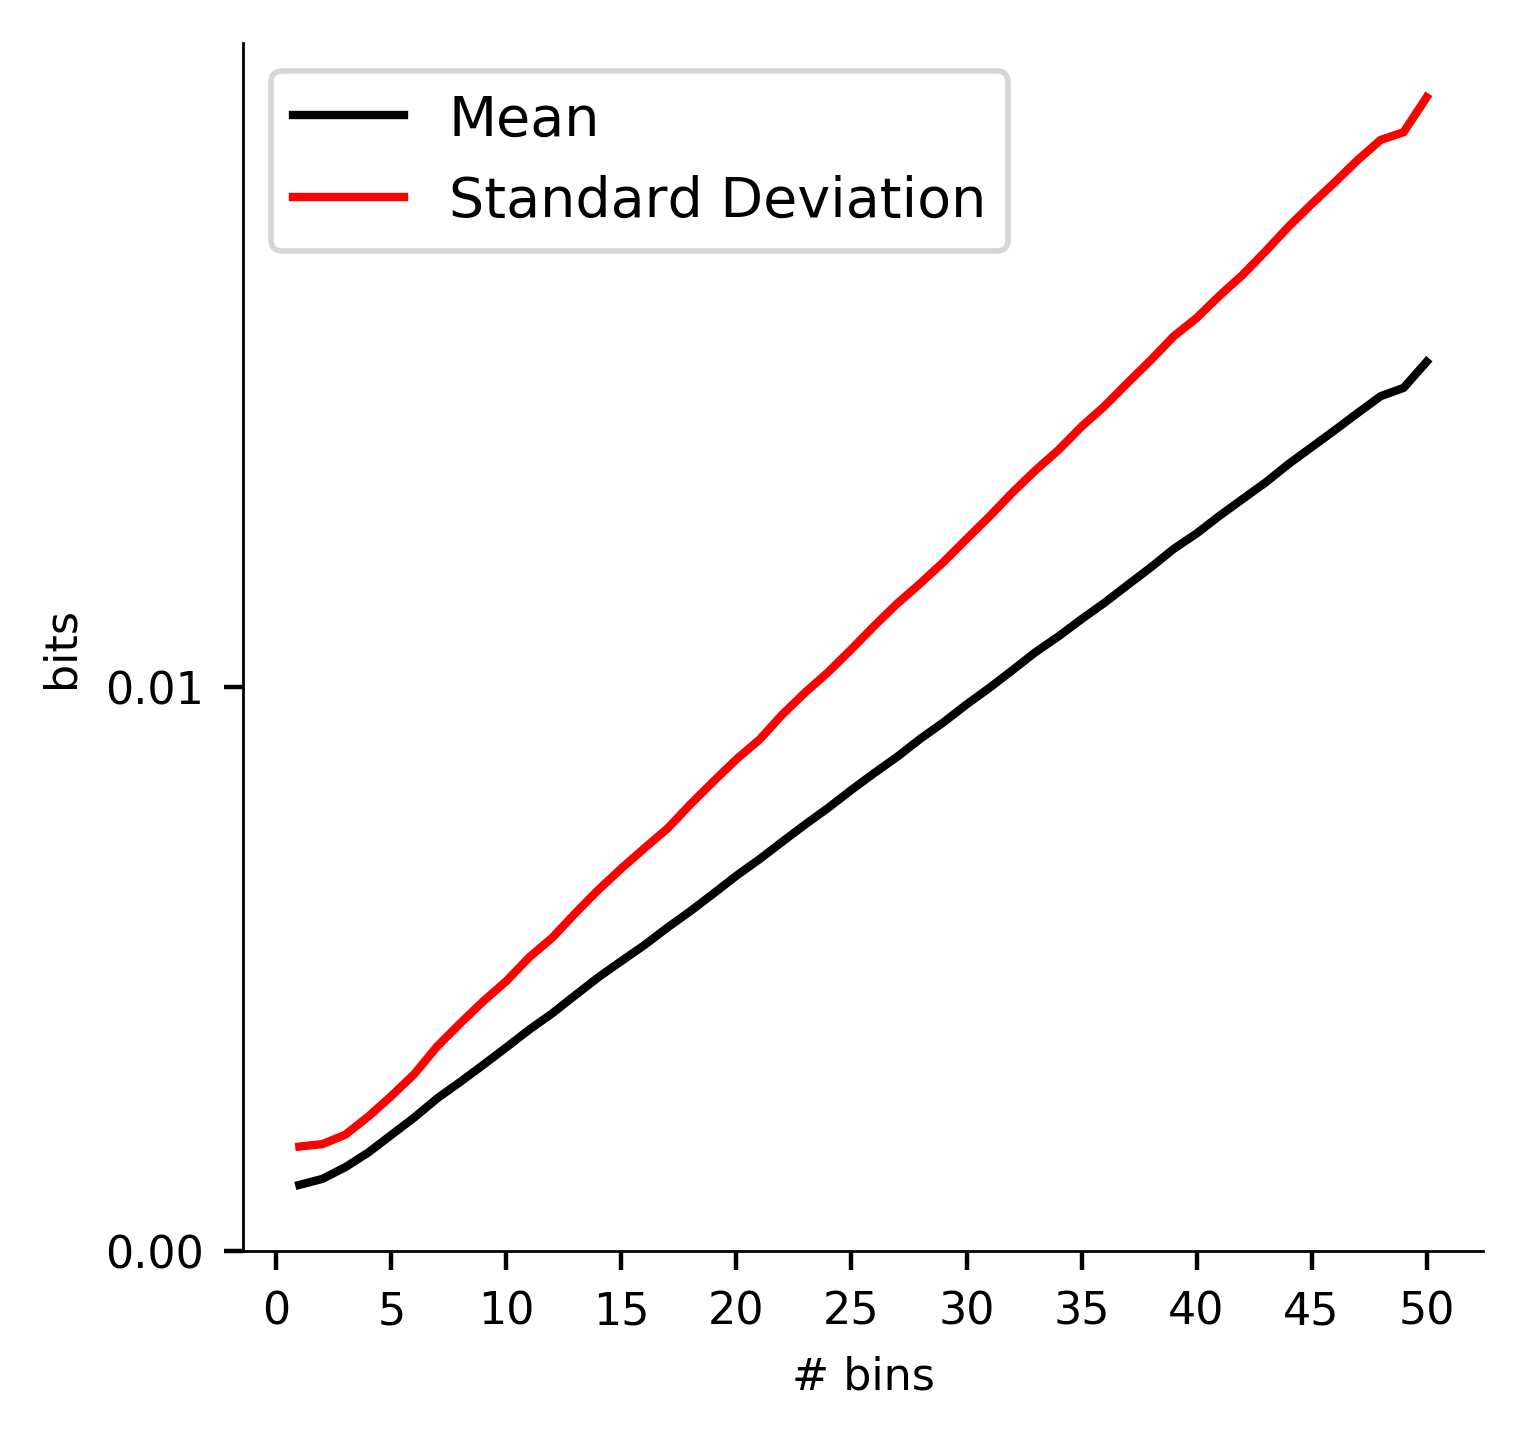

In [126]:
ANF_means = []
ANF_stdev = []

print(sum(np.array(ANF_pre2_pop_mutual_info[3])))

for i in range(len(ANF_nov3_pop_mutual_info)):
    ANF_means.append(np.mean(np.array([np.mean(np.array(ANF_nov1_pop_mutual_info[i])),
                          np.mean(np.array(ANF_nov2_pop_mutual_info[i])),
                          np.mean(np.array(ANF_nov3_pop_mutual_info[i])),
                          np.mean(np.array(ANF_pre1_pop_mutual_info[i])),
                          np.mean(np.array(ANF_pre2_pop_mutual_info[i]))])))
    ANF_stdev.append(np.mean(np.array([statistics.stdev(np.array(ANF_nov1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANF_nov2_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANF_nov3_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANF_pre1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANF_pre2_pop_mutual_info[i]))])))
ANL_means = []
ANL_stdev = []
for i in range(len(ANL_nov3_pop_mutual_info)):
    ANL_means.append(np.mean(np.array([np.mean(np.array(ANL_nov1_pop_mutual_info[i])),
                          np.mean(np.array(ANL_nov2_pop_mutual_info[i])),
                          np.mean(np.array(ANL_nov3_pop_mutual_info[i])),
                          np.mean(np.array(ANL_pre1_pop_mutual_info[i])),
                          np.mean(np.array(ANL_pre2_pop_mutual_info[i]))])))
    ANL_stdev.append(np.mean(np.array([statistics.stdev(np.array(ANL_nov1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANL_nov2_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANL_nov3_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANL_pre1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANL_pre2_pop_mutual_info[i]))])))
    
ANI_means = []
ANI_stdev = []
for i in range(len(ANI_nov3_pop_mutual_info)):
    ANI_means.append(np.mean(np.array([np.mean(np.array(ANI_nov1_pop_mutual_info[i])),
                          np.mean(np.array(ANI_nov2_pop_mutual_info[i])),
                          np.mean(np.array(ANI_nov3_pop_mutual_info[i])),
                          np.mean(np.array(ANI_pre1_pop_mutual_info[i])),
                          np.mean(np.array(ANI_pre2_pop_mutual_info[i]))])))
    ANI_stdev.append(np.mean(np.array([statistics.stdev(np.array(ANI_nov1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANI_nov2_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANI_nov3_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANI_pre1_pop_mutual_info[i])),
                          statistics.stdev(np.array(ANI_pre2_pop_mutual_info[i]))])))

fig = plt.figure(num=None, figsize=(4, 4), dpi=400, facecolor='w', edgecolor='k')
bins =  np.arange(1,len(ANF_means)+1,1)
plt.plot(bins, ANF_means, color='black')
plt.plot(bins, ANF_stdev, color='red')
plt.legend(['Mean', 'Standard Deviation'])
plt.xticks(np.arange(0, 52, 5))
plt.yticks(np.arange(0, 0.02, 0.01))
plt.xlabel('# bins')
plt.ylabel('bits')    
sns.despine()
plt.show()

# plt.plot(bins, ANL_means)
# plt.plot(bins, ANL_stdev)
# plt.show()

# plt.plot(bins, ANI_means)
# plt.plot(bins, ANI_stdev)
# plt.show()

0.001869440421690547
0.0012089148092306432


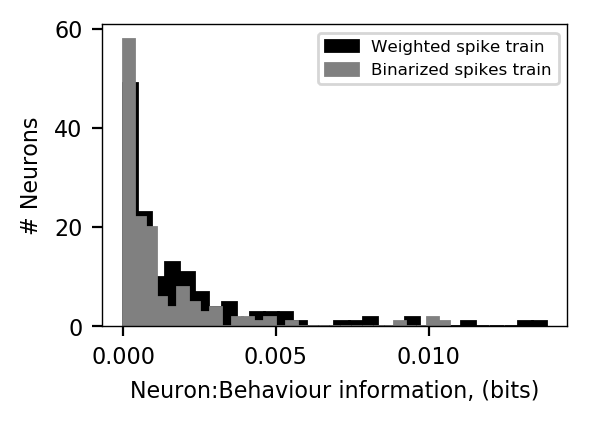

In [128]:
mi_r_cat = np.array(ANF_pre2_pop_mutual_info[3])
mi_rb = np.array(ANF_pre2_pop_mutual_info[0])
from matplotlib.patches import Rectangle

plt.figure(figsize=(3, 2), dpi=200)
plt.hist(mi_r_cat, bins=30, color = 'k', edgecolor='k')
plt.hist(mi_rb, bins=30, color = 'gray', edgecolor='gray')
plt.xlabel("Neuron:Behaviour information, (bits)")
plt.ylabel("# Neurons")

labels= ["Weighted spike train", "Binarized spikes train"]
plt.legend(labels, loc=1, prop={'size': 6})

print(np.mean(mi_r_cat))
print(np.mean(mi_rb))

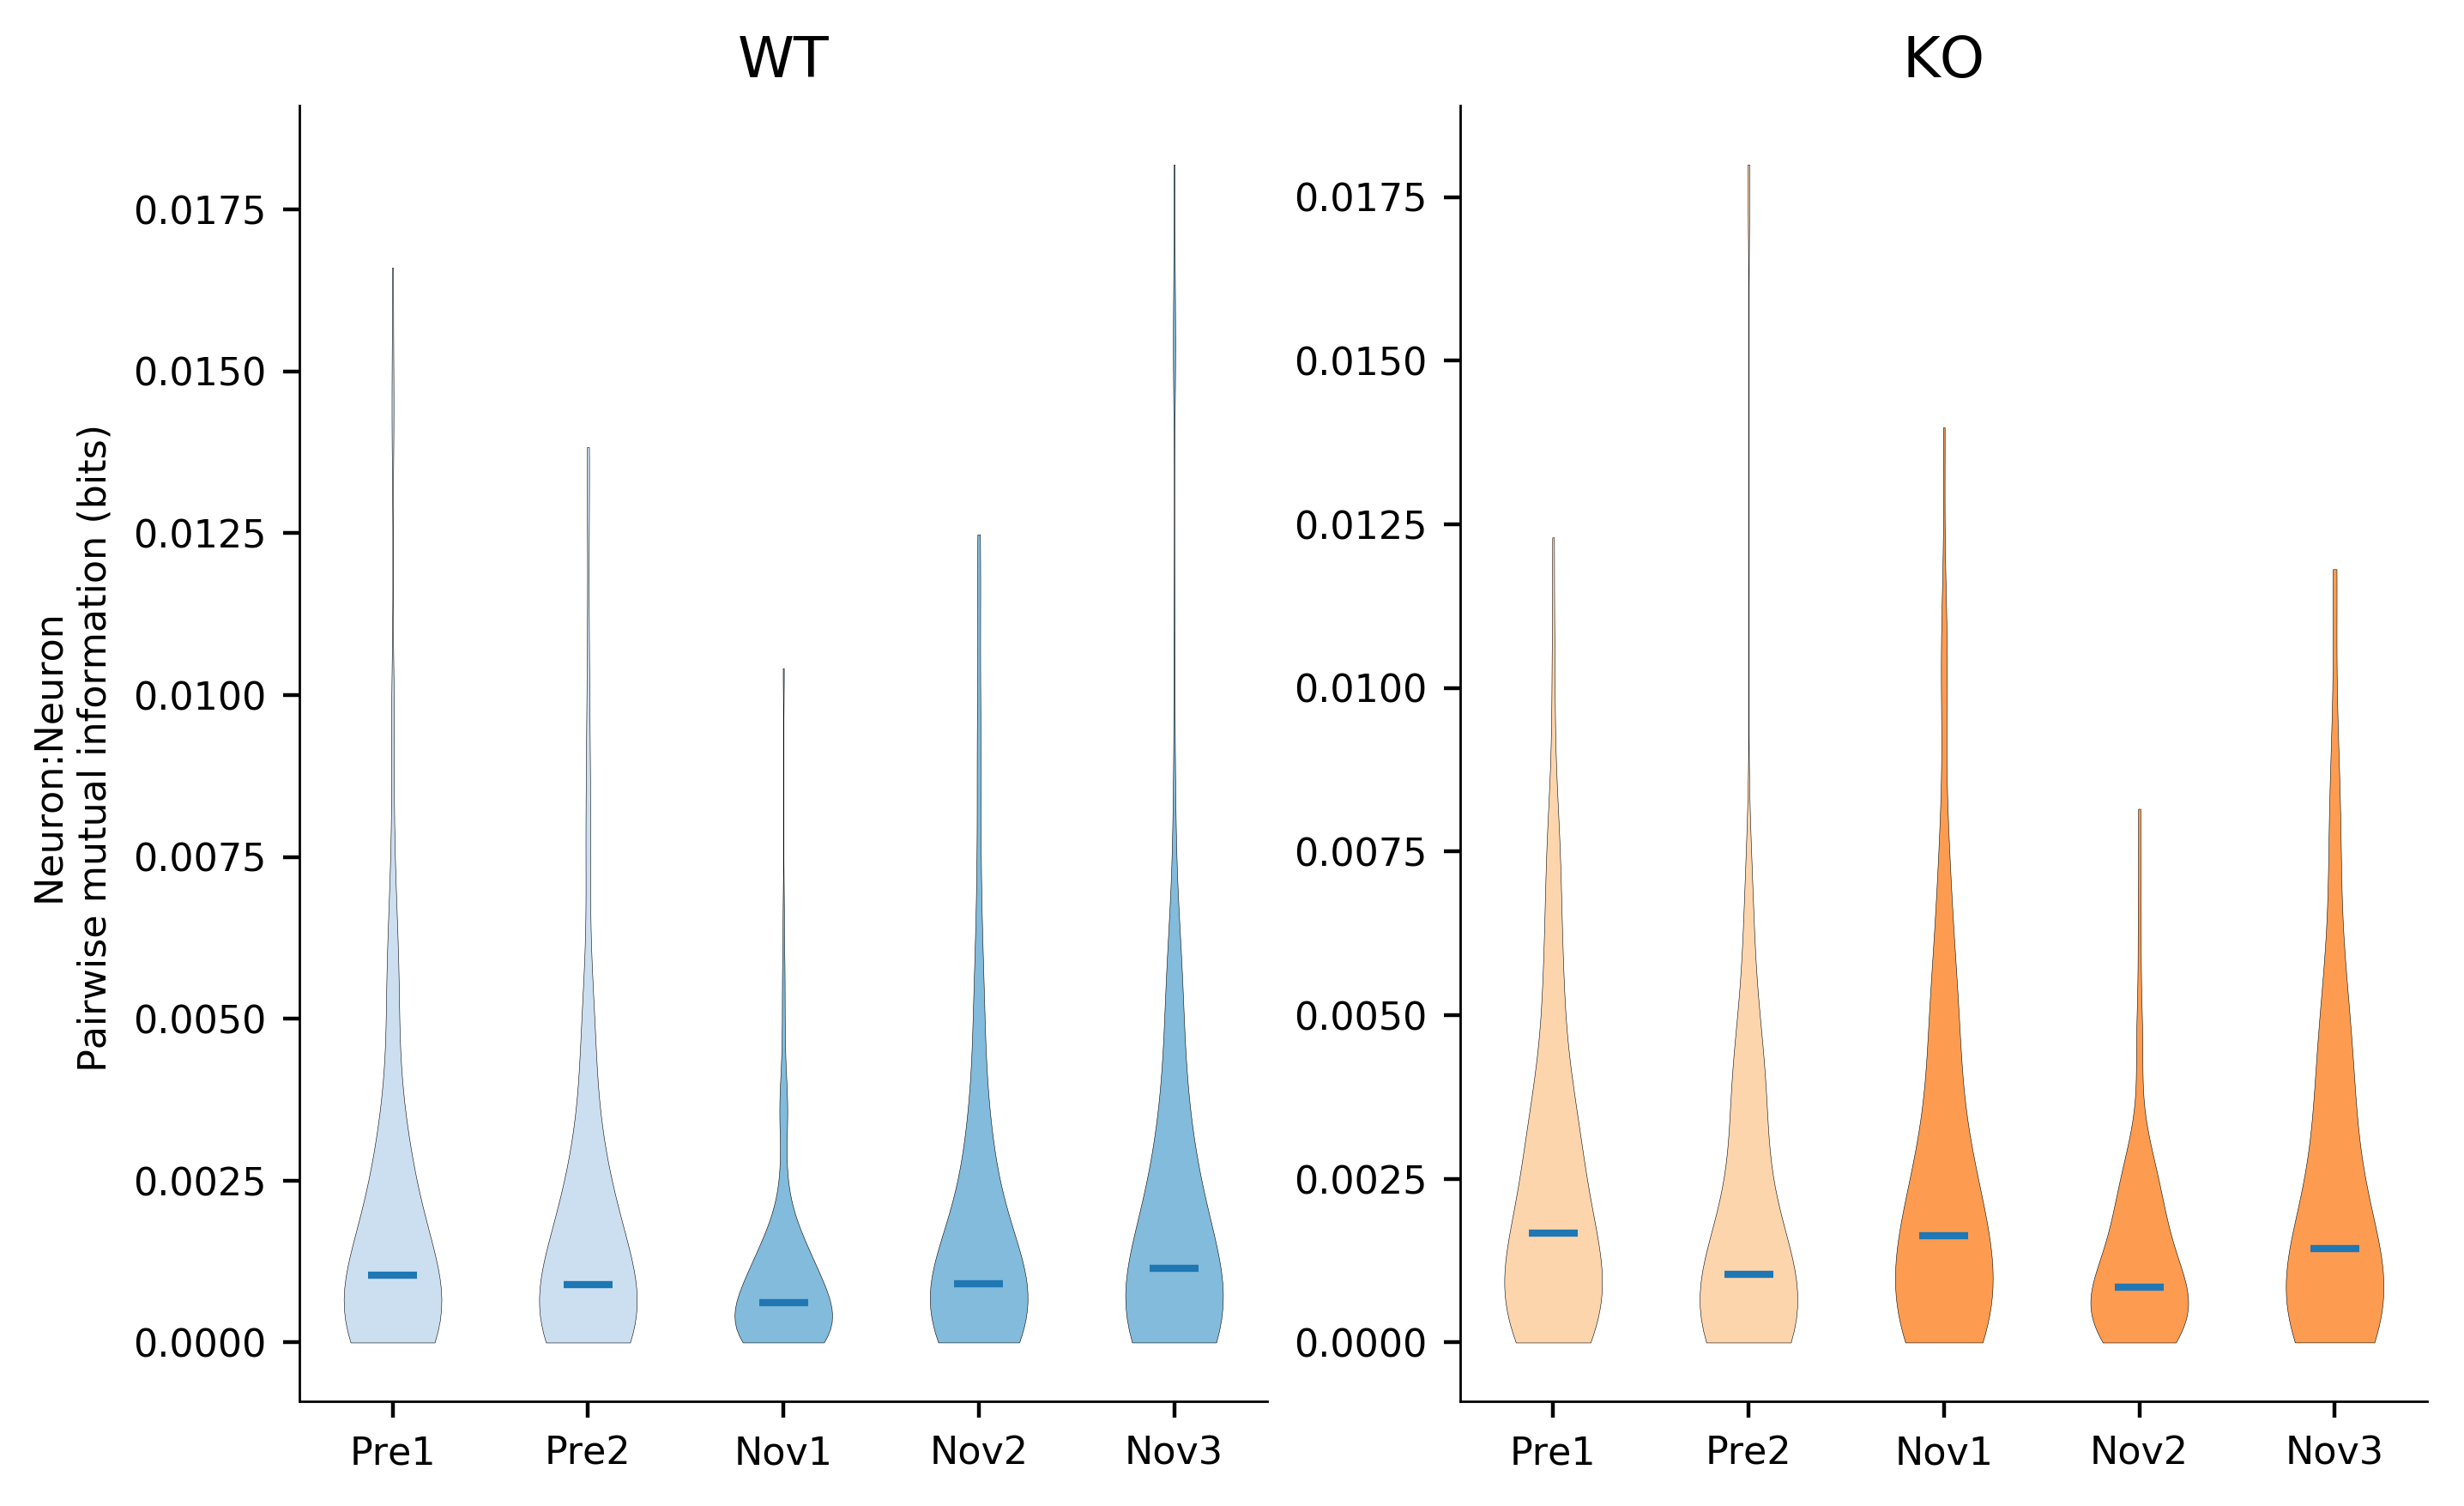

In [135]:
import matplotlib as mpl
c = np.arange(1, 10 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap_ON = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap_OFF = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)
cmap_WT = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap_KO = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Oranges)


ANF_pre1_pop_mutual_info_4bins = ANF_pre1_pop_mutual_info[3]
ANF_pre2_pop_mutual_info_4bins = ANF_pre2_pop_mutual_info[3]

ANF_nov1_pop_mutual_info_4bins = ANF_nov1_pop_mutual_info[3]
ANF_nov2_pop_mutual_info_4bins = ANF_nov2_pop_mutual_info[3]
ANF_nov3_pop_mutual_info_4bins = ANF_nov3_pop_mutual_info[3]

ANL_pre1_pop_mutual_info_4bins = ANL_pre1_pop_mutual_info[3]
ANL_pre2_pop_mutual_info_4bins = ANL_pre2_pop_mutual_info[3]
ANL_nov1_pop_mutual_info_4bins = ANL_nov1_pop_mutual_info[3]
ANL_nov2_pop_mutual_info_4bins = ANL_nov2_pop_mutual_info[3]
ANL_nov3_pop_mutual_info_4bins = ANL_nov3_pop_mutual_info[3]

ANI_pre1_pop_mutual_info_4bins = ANI_pre1_pop_mutual_info[3]
ANI_pre2_pop_mutual_info_4bins = ANI_pre2_pop_mutual_info[3]
ANI_nov1_pop_mutual_info_4bins = ANI_nov1_pop_mutual_info[3]
ANI_nov2_pop_mutual_info_4bins = ANI_nov2_pop_mutual_info[3]
ANI_nov3_pop_mutual_info_4bins = ANI_nov3_pop_mutual_info[3]

ko_pre1_pop_mutual_info_4bins = np.array([item for sublist in [ANL_pre1_pop_mutual_info_4bins, ANI_pre1_pop_mutual_info_4bins] for item in sublist])
ko_pre2_pop_mutual_info_4bins = np.array([item for sublist in [ANL_pre2_pop_mutual_info_4bins, ANI_pre2_pop_mutual_info_4bins] for item in sublist])
ko_nov1_pop_mutual_info_4bins = np.array([item for sublist in [ANL_nov1_pop_mutual_info_4bins, ANI_nov1_pop_mutual_info_4bins] for item in sublist])
ko_nov2_pop_mutual_info_4bins = np.array([item for sublist in [ANL_nov2_pop_mutual_info_4bins, ANI_nov2_pop_mutual_info_4bins] for item in sublist])
ko_nov3_pop_mutual_info_4bins = np.array([item for sublist in [ANL_nov3_pop_mutual_info_4bins, ANI_nov3_pop_mutual_info_4bins] for item in sublist])

wt_stage_mi = [ANF_pre1_pop_mutual_info_4bins,
               ANF_pre2_pop_mutual_info_4bins,
               ANF_nov1_pop_mutual_info_4bins,
               ANF_nov2_pop_mutual_info_4bins,
               ANF_nov3_pop_mutual_info_4bins]

ko_stage_mi = [ko_pre1_pop_mutual_info_4bins,
               ko_pre2_pop_mutual_info_4bins,
               ko_nov1_pop_mutual_info_4bins,
               ko_nov2_pop_mutual_info_4bins,
               ko_nov3_pop_mutual_info_4bins]

loc = range(1, len(wt_stage_mi)+1)
labels = ['Pre1','Pre2','Nov1','Nov2', 'Nov3']
colors = [cmap_WT.to_rgba(3),
          cmap_WT.to_rgba(3),
          cmap_WT.to_rgba(5),
          cmap_WT.to_rgba(5),
          cmap_WT.to_rgba(5)]



fig, axs = plt.subplots(1, 2, figsize=(8,5), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2)

axs[0] = plt.subplot(gs[0])
axs[0] = plt.violinplot(wt_stage_mi, showextrema = False, showmedians=True)
plt.xticks(loc, labels)
plt.grid(False)
sns.despine()
for pc, color in zip(axs[0]['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(1)
    pc.set_edgecolor('black')
    pc.set_linewidth(0.1)
axs[0] = plt.title('WT')
axs[0] = plt.ylabel("Neuron:Neuron \n Pairwise mutual information (bits)")


colors = [cmap_KO.to_rgba(3),
          cmap_KO.to_rgba(3),
          cmap_KO.to_rgba(5),
          cmap_KO.to_rgba(5),
          cmap_KO.to_rgba(5)]

axs[1] = plt.subplot(gs[1])
axs[1] = plt.violinplot(ko_stage_mi, showextrema = False, showmedians=True)

plt.xticks(loc, labels)
plt.grid(False)
sns.despine()

for pc, color in zip(axs[1]['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(1)
    pc.set_edgecolor('black')
    pc.set_linewidth(0.1)
axs[1] = plt.title('KO')     
plt.show()

In [138]:
stages = ['Pre1', 'Pre2', 'Nov1', 'Nov2', 'Nov3']
for i, j, stages in zip(wt_stage_mi, ko_stage_mi, stages):
    print(stages, 'wt', np.mean(np.array(i)), 'ko', np.mean(np.array(j)))

Pre1 wt 0.001914055165353377 ko 0.002455652055088575
Pre2 wt 0.001869440421690547 ko 0.0019125708534743226
Nov1 wt 0.0010128762339063919 ko 0.0025224452862649335
Nov2 wt 0.0018860403045400447 ko 0.0013773669433693376
Nov3 wt 0.00204060695086197 ko 0.002491457842553358


In [140]:
0.58/(4.37/0.001)

0.00013272311212814643

In [141]:
0.0001*(4.37/0.001)

0.437